# Experiment 2

## Preparing dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten, LSTM
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Load and prepare data
ECU1 = np.array(pd.read_csv("/content/drive/MyDrive/TestBench Dataset/ECU1.csv", header=None))
ECU2 = np.array(pd.read_csv("/content/drive/MyDrive/TestBench Dataset/ECU2.csv", header=None))
ECU3 = np.array(pd.read_csv("/content/drive/MyDrive/TestBench Dataset/ECU3.csv", header=None))
ECU4 = np.array(pd.read_csv("/content/drive/MyDrive/TestBench Dataset/ECU4.csv", header=None))
ECU5 = np.array(pd.read_csv("/content/drive/MyDrive/TestBench Dataset/ECU5.csv", header=None))
ECU6 = np.array(pd.read_csv("/content/drive/MyDrive/TestBench Dataset/ECU6.csv", header=None))
ECU7 = np.array(pd.read_csv("/content/drive/MyDrive/TestBench Dataset/ECU7.csv", header=None))
ECU8 = np.array(pd.read_csv("/content/drive/MyDrive/TestBench Dataset/ECU8.csv", header=None))
ECU9 = np.array(pd.read_csv("/content/drive/MyDrive/TestBench Dataset/ECU9.csv", header=None))
ECU10 = np.array(pd.read_csv("/content/drive/MyDrive/TestBench Dataset/ECU10.csv", header=None))

features_array = np.concatenate((ECU1, ECU2, ECU3, ECU4, ECU5, ECU6, ECU7, ECU8, ECU9, ECU10))
X = features_array[:, :-1]
y = features_array[:, -1]

# Convert labels to integers and one-hot encode
y = y.astype(int)
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes=num_classes)

# Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Function to plot training history
def plot_history(history, model_name):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()


## ANN

Epoch 1/100
2734/2735 [============================>.] - ETA: 0s - loss: 0.0771 - accuracy: 0.9824
Epoch 1: val_loss improved from inf to 0.00783, saving model to ANN_best_model.keras
2735/2735 [==============================] - 27s 9ms/step - loss: 0.0770 - accuracy: 0.9824 - val_loss: 0.0078 - val_accuracy: 0.9975 - lr: 0.0010
Epoch 2/100
2732/2735 [============================>.] - ETA: 0s - loss: 0.0186 - accuracy: 0.9952
Epoch 2: val_loss improved from 0.00783 to 0.00460, saving model to ANN_best_model.keras
2735/2735 [==============================] - 23s 8ms/step - loss: 0.0186 - accuracy: 0.9952 - val_loss: 0.0046 - val_accuracy: 0.9985 - lr: 0.0010
Epoch 3/100
2735/2735 [==============================] - ETA: 0s - loss: 0.0131 - accuracy: 0.9966
Epoch 3: val_loss improved from 0.00460 to 0.00399, saving model to ANN_best_model.keras
2735/2735 [==============================] - 24s 9ms/step - loss: 0.0131 - accuracy: 0.9966 - val_loss: 0.0040 - val_accuracy: 0.9987 - lr: 0.0010

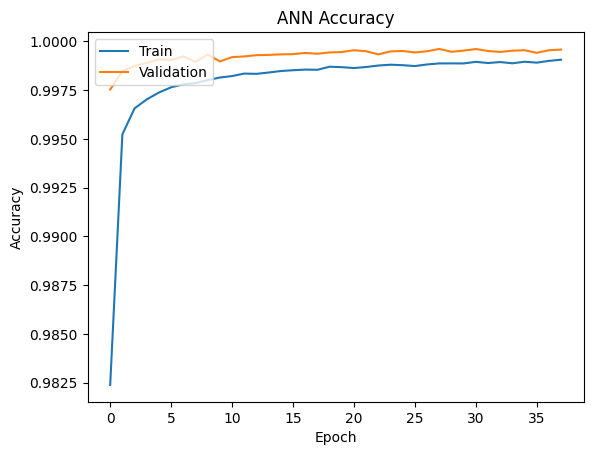

Results Comparison Table:
  model      loss  accuracy  f1_score
0   ANN  0.001819   0.99948   0.99948

Model: ANN
Confusion Matrix:
[[14717     0     0     0     0     0     0     0     0     0]
 [    0 15045     0     0     0     0     0     1     0     0]
 [    0     0 15117     0     0     0     0     0     0     0]
 [    0     0     0 14973     0     0     0     7     0     0]
 [    0     0     0     0 14755     0     6     6     0     0]
 [    0     0     0     0     0 15148    21     1     2     0]
 [    0     0     0     2     0     1 15091     5     4     0]
 [    0     4     0     5     3     0     0 15106     0     0]
 [    0     0     0     0     0     0     1     0 15028     1]
 [    0     0     0     0     1     0     0     0     7 14942]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14717
           1       1.00      1.00      1.00     15046
           2       1.00      1.00      1.00     151

In [ ]:
# ANN Model
def build_ann():
    model = Sequential()
    model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train and evaluate the ANN model
def train_evaluate_model(model, model_name):
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
    model_checkpoint = ModelCheckpoint(f'{model_name}_best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001, verbose=1)

    history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=100, batch_size=256, callbacks=[early_stopping, model_checkpoint, reduce_lr])

    loss, accuracy = model.evaluate(X_test, y_test)
    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_true = np.argmax(y_test, axis=1)

    f1 = f1_score(y_true, y_pred, average='weighted')

    plot_history(history, model_name)

    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred)

    return {'model': model_name, 'loss': loss, 'accuracy': accuracy, 'f1_score': f1, 'conf_matrix': conf_matrix, 'class_report': class_report}

# Train and evaluate the ANN model
ann_model = build_ann()
results = [train_evaluate_model(ann_model, 'ANN')]

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print results
print("Results Comparison Table:")
print(results_df[['model', 'loss', 'accuracy', 'f1_score']])

# Print confusion matrices and classification reports
for result in results:
    print(f"\nModel: {result['model']}")
    print("Confusion Matrix:")
    print(result['conf_matrix'])
    print("Classification Report:")
    print(result['class_report'])


## CNN

Epoch 1/100
2735/2735 [==============================] - ETA: 0s - loss: 0.0326 - accuracy: 0.9922
Epoch 1: val_loss improved from inf to 0.00820, saving model to CNN_best_model.keras
2735/2735 [==============================] - 30s 9ms/step - loss: 0.0326 - accuracy: 0.9922 - val_loss: 0.0082 - val_accuracy: 0.9973 - lr: 0.0010
Epoch 2/100
2725/2735 [============================>.] - ETA: 0s - loss: 0.0067 - accuracy: 0.9977
Epoch 2: val_loss improved from 0.00820 to 0.00629, saving model to CNN_best_model.keras
2735/2735 [==============================] - 14s 5ms/step - loss: 0.0067 - accuracy: 0.9977 - val_loss: 0.0063 - val_accuracy: 0.9977 - lr: 0.0010
Epoch 3/100
2731/2735 [============================>.] - ETA: 0s - loss: 0.0048 - accuracy: 0.9984
Epoch 3: val_loss improved from 0.00629 to 0.00450, saving model to CNN_best_model.keras
2735/2735 [==============================] - 14s 5ms/step - loss: 0.0048 - accuracy: 0.9984 - val_loss: 0.0045 - val_accuracy: 0.9985 - lr: 0.0010

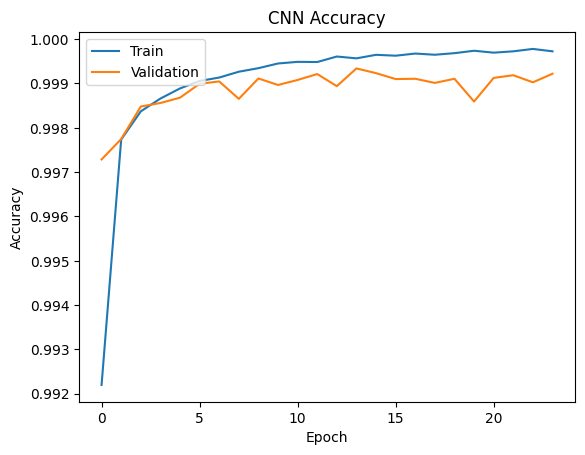

Results Comparison Table:
  model      loss  accuracy  f1_score
0   CNN  0.003528  0.999247  0.999247

Model: CNN
Confusion Matrix:
[[14716     0     0     0     0     1     0     0     0     0]
 [    0 15041     0     0     0     0     0     5     0     0]
 [    0     0 15117     0     0     0     0     0     0     0]
 [    0     0     0 14973     0     0     1     6     0     0]
 [    0     1     0     0 14733     2    11    18     0     2]
 [    0     0     0     0     0 15157    14     0     1     0]
 [    0     0     0     0     1     2 15096     3     1     0]
 [    0     7     0     3     1     1    11 15095     0     0]
 [    0     0     0     0     0     0     3     0 15027     0]
 [    0     1     0     0     0     0     3     0    14 14932]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14717
           1       1.00      1.00      1.00     15046
           2       1.00      1.00      1.00     151

In [ ]:
# Reshape data for CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
X_val_cnn = X_val.reshape(X_val.shape[0], X_val.shape[1], 1, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, 1)

# Build and train the CNN model
cnn_model = build_cnn((X_train.shape[1], 1, 1))

# Train and evaluate a given model
def train_evaluate_model(model, model_name):
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
    model_checkpoint = ModelCheckpoint(f'{model_name}_best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001, verbose=1)

    history = model.fit(X_train_cnn, y_train, validation_data=(X_val_cnn, y_val),
                        epochs=100, batch_size=256, callbacks=[early_stopping, model_checkpoint, reduce_lr])

    loss, accuracy = model.evaluate(X_test_cnn, y_test)
    y_pred_prob = model.predict(X_test_cnn)
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_true = np.argmax(y_test, axis=1)

    f1 = f1_score(y_true, y_pred, average='weighted')

    plot_history(history, model_name)

    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred)

    return {'model': model_name, 'loss': loss, 'accuracy': accuracy, 'f1_score': f1, 'conf_matrix': conf_matrix, 'class_report': class_report}

# Train and evaluate the CNN model
results = []
results.append(train_evaluate_model(cnn_model, 'CNN'))

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print results
print("Results Comparison Table:")
print(results_df[['model', 'loss', 'accuracy', 'f1_score']])

# Print confusion matrices and classification reports
for result in results:
    print(f"\nModel: {result['model']}")
    print("Confusion Matrix:")
    print(result['conf_matrix'])
    print("Classification Report:")
    print(result['class_report'])


## RNN

Epoch 1/100
2733/2735 [============================>.] - ETA: 0s - loss: 0.2160 - accuracy: 0.9424
Epoch 1: val_loss improved from inf to 0.18049, saving model to RNN_best_model.keras
2735/2735 [==============================] - 26s 9ms/step - loss: 0.2160 - accuracy: 0.9424 - val_loss: 0.1805 - val_accuracy: 0.9556 - lr: 0.0010
Epoch 2/100
2731/2735 [============================>.] - ETA: 0s - loss: 0.0989 - accuracy: 0.9699
Epoch 2: val_loss improved from 0.18049 to 0.11579, saving model to RNN_best_model.keras
2735/2735 [==============================] - 22s 8ms/step - loss: 0.0989 - accuracy: 0.9699 - val_loss: 0.1158 - val_accuracy: 0.9664 - lr: 0.0010
Epoch 3/100
2734/2735 [============================>.] - ETA: 0s - loss: 0.0737 - accuracy: 0.9762
Epoch 3: val_loss improved from 0.11579 to 0.08723, saving model to RNN_best_model.keras
2735/2735 [==============================] - 23s 8ms/step - loss: 0.0737 - accuracy: 0.9762 - val_loss: 0.0872 - val_accuracy: 0.9750 - lr: 0.0010

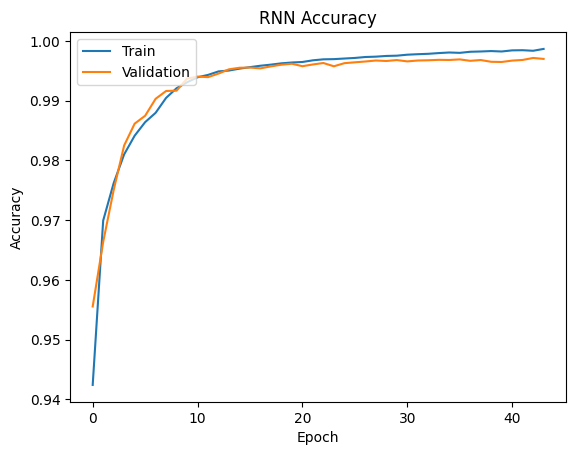

Results Comparison Table:
  model      loss  accuracy  f1_score
0   CNN  0.003528  0.999247  0.999247
1   RNN  0.009697  0.996873  0.996873

Model: CNN
Confusion Matrix:
[[14716     0     0     0     0     1     0     0     0     0]
 [    0 15041     0     0     0     0     0     5     0     0]
 [    0     0 15117     0     0     0     0     0     0     0]
 [    0     0     0 14973     0     0     1     6     0     0]
 [    0     1     0     0 14733     2    11    18     0     2]
 [    0     0     0     0     0 15157    14     0     1     0]
 [    0     0     0     0     1     2 15096     3     1     0]
 [    0     7     0     3     1     1    11 15095     0     0]
 [    0     0     0     0     0     0     3     0 15027     0]
 [    0     1     0     0     0     0     3     0    14 14932]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14717
           1       1.00      1.00      1.00     15046
           2 

In [ ]:
# RNN Model
def build_rnn():
    model = Sequential()
    model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Reshape data for RNN
X_train_rnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val_rnn = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test_rnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Train and evaluate the RNN model
rnn_model = build_rnn()
results.append(train_evaluate_model(rnn_model, 'RNN'))

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print results
print("Results Comparison Table:")
print(results_df[['model', 'loss', 'accuracy', 'f1_score']])

# Print confusion matrices and classification reports
for result in results:
    print(f"\nModel: {result['model']}")
    print("Confusion Matrix:")
    print(result['conf_matrix'])
    print("Classification Report:")
    print(result['class_report'])


## SVM

In [ ]:
# SVM Model
def svm_model():
    model = SVC(probability=True)
    model.fit(X_train, np.argmax(y_train, axis=1))
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    f1 = f1_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
    conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
    class_report = classification_report(np.argmax(y_test, axis=1), y_pred)
    loss = None  # SVM does not provide a loss value

    return {'model': 'SVM', 'loss': loss, 'accuracy': accuracy, 'f1_score': f1, 'conf_matrix': conf_matrix, 'class_report': class_report}

# Train and evaluate the SVM model
results.append(svm_model())

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print results
print("Results Comparison Table:")
print(results_df[['model', 'loss', 'accuracy', 'f1_score']])

# Print confusion matrices and classification reports
for result in results:
    print(f"\nModel: {result['model']}")
    print("Confusion Matrix:")
    print(result['conf_matrix'])
    print("Classification Report:")
    print(result['class_report'])


Results Comparison Table:
  model      loss  accuracy  f1_score
0   CNN  0.003528  0.999247  0.999247
1   RNN  0.009697  0.996873  0.996873
2   SVM       NaN  0.999093  0.999094

Model: CNN
Confusion Matrix:
[[14716     0     0     0     0     1     0     0     0     0]
 [    0 15041     0     0     0     0     0     5     0     0]
 [    0     0 15117     0     0     0     0     0     0     0]
 [    0     0     0 14973     0     0     1     6     0     0]
 [    0     1     0     0 14733     2    11    18     0     2]
 [    0     0     0     0     0 15157    14     0     1     0]
 [    0     0     0     0     1     2 15096     3     1     0]
 [    0     7     0     3     1     1    11 15095     0     0]
 [    0     0     0     0     0     0     3     0 15027     0]
 [    0     1     0     0     0     0     3     0    14 14932]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14717
           1       1.00      

## GBM

In [ ]:
# GBM Model
def gbm_model():
    model = GradientBoostingClassifier()
    model.fit(X_train, np.argmax(y_train, axis=1))
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    f1 = f1_score(np.argmax(y_test, axis=1), y_pred, average='weighted')
    conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
    class_report = classification_report(np.argmax(y_test, axis=1), y_pred)
    loss = None  # GBM does not provide a loss value

    return {'model': 'GBM', 'loss': loss, 'accuracy': accuracy, 'f1_score': f1, 'conf_matrix': conf_matrix, 'class_report': class_report}

# Train and evaluate the GBM model
results.append(gbm_model())

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print results
print("Results Comparison Table:")
print(results_df[['model', 'loss', 'accuracy', 'f1_score']])

# Print confusion matrices and classification reports
for result in results:
    print(f"\nModel: {result['model']}")
    print("Confusion Matrix:")
    print(result['conf_matrix'])
    print("Classification Report:")
    print(result['class_report'])


## Experiment 2 Conclusion

In [40]:
import pandas as pd

# Define the current results_df
data = {
    'model': ['CNN', 'RNN', 'SVM', 'GBM'],
    'loss': [0.003528, 0.009697, None, None],
    'accuracy': [0.999247, 0.996873, 0.999093, 0.997573],
    'f1_score': [0.999247, 0.996873, 0.999094, 0.997575],
}

# Create DataFrame
results_df = pd.DataFrame(data)

# Add ANN results
ann_data = pd.DataFrame({
    'model': ['ANN'],
    'loss': [0.001819],
    'accuracy': [0.99948],
    'f1_score': [0.99948]
})

# Concatenate the ANN data to the results DataFrame
results_df = pd.concat([results_df, ann_data], ignore_index=True)

# Sort by accuracy
results_df = results_df.sort_values(by='accuracy', ascending=False).reset_index(drop=True)

# Print results
print("Results Comparison Table:")
print(results_df[['model', 'accuracy']])

# Conclusion based on accuracy
print("\nConclusion:")
best_model_accuracy = results_df.loc[0, 'model']
print(f"The model with the highest accuracy is: {best_model_accuracy}")

# Print ranked models
print("\nRanked Models by Accuracy:")
for idx, row in results_df.iterrows():
    print(f"{idx + 1}. {row['model']} - Accuracy: {row['accuracy']}")


Results Comparison Table:
  model  accuracy
0   ANN  0.999480
1   CNN  0.999247
2   SVM  0.999093
3   GBM  0.997573
4   RNN  0.996873

Conclusion:
The model with the highest accuracy is: ANN

Ranked Models by Accuracy:
1. ANN - Accuracy: 0.99948
2. CNN - Accuracy: 0.999247
3. SVM - Accuracy: 0.999093
4. GBM - Accuracy: 0.997573
5. RNN - Accuracy: 0.996873
